# **Statement of Analysis Task**
**Find the notable/interesting features of airbnb in New York**

## **PHASE 1: Ask**
#### **1. Main Question**
* Which area is most popular and expensive?
* Which room is most popular and why?
* Which host is the most popular one?

## **PHASE 2: Prepare**
#### **1. Determine the credibility of the data.**
* This dataset is public dataset from Airbnb

In [1]:
import numpy as np
from numpy import median
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv", parse_dates=['last_review'])

In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [5]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaT,NaN,1,365


In [6]:
df[["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","38,843.00","48,895.00","48,895.00"
mean,152.72,7.03,23.27,1.37,7.14,112.78
std,240.15,20.51,44.55,1.68,32.95,131.62
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,69.00,1.00,1.00,0.19,1.00,0.00
50%,106.00,3.00,5.00,0.72,1.00,45.00
75%,175.00,5.00,24.00,2.02,2.00,227.00
max,"10,000.00","1,250.00",629.00,58.50,327.00,365.00


## **PHASE 3: Process**
#### **1. Data Cleaning**


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

In [9]:
round(percent_missing, 2)

2.57

The reviews are not the main point of this analysis and since only two colums about review have many null values, i will just leave it.

## **PHASE 4: Analyze**
#### **1. Identify trends and relationships.**
* **Area vs Price vs Room Type** (What kind of areas are more expensive than other areas? and why?)
* **Room vs Host vs Review** (What kind of rooms, areas or hosts are popular than others? and why?)

#### **1. Area vs Price vs Room (What kind of areas or rooms are more expensive than others? and why?)**

In [10]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

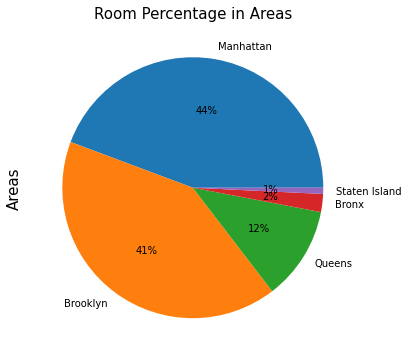

In [11]:
df['neighbourhood_group'].value_counts().plot(
    kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,6))

plt.title("Room Percentage in Areas", size=15)
plt.ylabel("Areas", size=15)

plt.show()

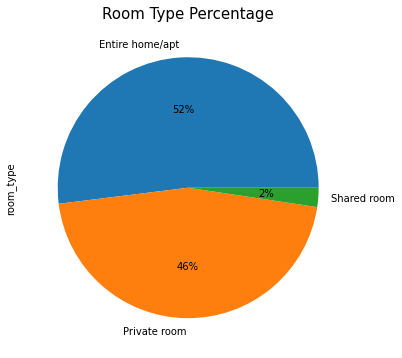

In [12]:
df['room_type'].value_counts().plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,6))

plt.title("Room Type Percentage", size=15)

plt.show()

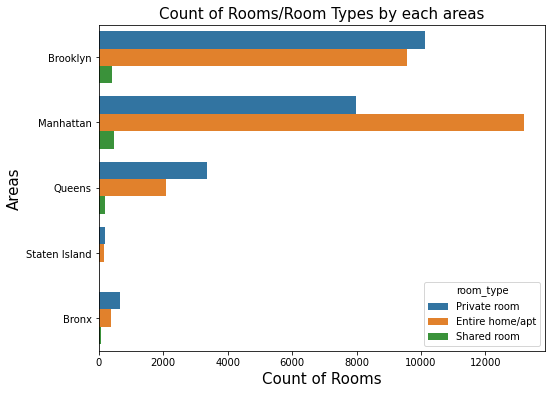

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=df, y='neighbourhood_group', hue='room_type', ax=ax)

plt.title('Count of Rooms/Room Types by each areas', size=15)
plt.xlabel('Count of Rooms', size=15)
plt.ylabel('Areas', size=15)

plt.show()

There are a lot of airbnb rooms in Manhatten and Brooklyn.

In [14]:
order = ['Manhattan', 'Brooklyn','Queens', 'Bronx', 'Staten Island']

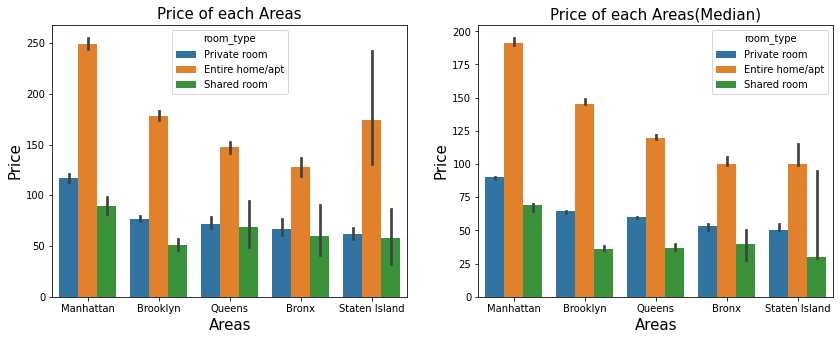

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(data=df, y='price', x='neighbourhood_group',ax=ax[0], hue='room_type' ,order=order)
ax[0].set_title('Price of each Areas', size=15)
ax[0].set_xlabel('Areas', size=15)
ax[0].set_ylabel('Price', size=15)

sns.barplot(data=df, y='price', x='neighbourhood_group',ax=ax[1], hue='room_type' ,order=order, estimator=median)
ax[1].set_title('Price of each Areas(Median)', size=15)
ax[1].set_xlabel('Areas', size=15)
ax[1].set_ylabel("Price", size=15)


plt.show()

Since there is only a small data about Staten Island, there is a huge error by it, i added median value also.
<br>

**This shows us that the entire home/apartment in New York is the most expensive one.**


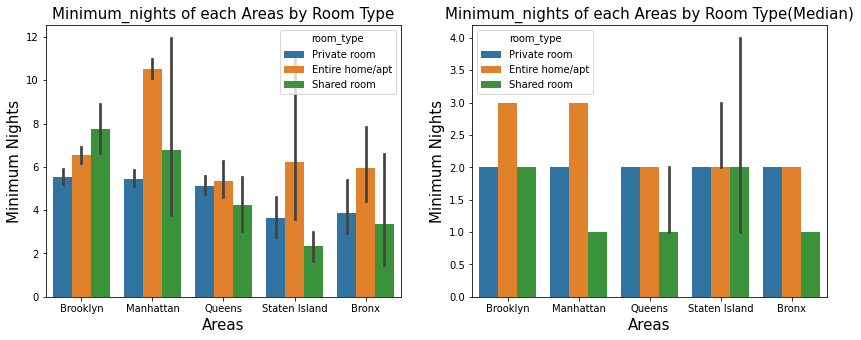

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=df, x='neighbourhood_group', y='minimum_nights', hue='room_type', ax=ax[0])
ax[0].set_title("Minimum_nights of each Areas by Room Type", size=15)
ax[0].set_xlabel("Areas", size=15)
ax[0].set_ylabel("Minimum Nights", size=15)

sns.barplot(data=df, x='neighbourhood_group', y='minimum_nights', hue='room_type', ax=ax[1], estimator=median)
ax[1].set_title("Minimum_nights of each Areas by Room Type(Median)", size=15)
ax[1].set_xlabel("Areas", size=15)
ax[1].set_ylabel("Minimum Nights", size=15)

plt.show()

Since there is a huge errors by shared room and Staten Island, which is a very small data, i added a median value just to check them out.
<br>

**The average of minimun nights by entire home/apartment is higher than other options.**

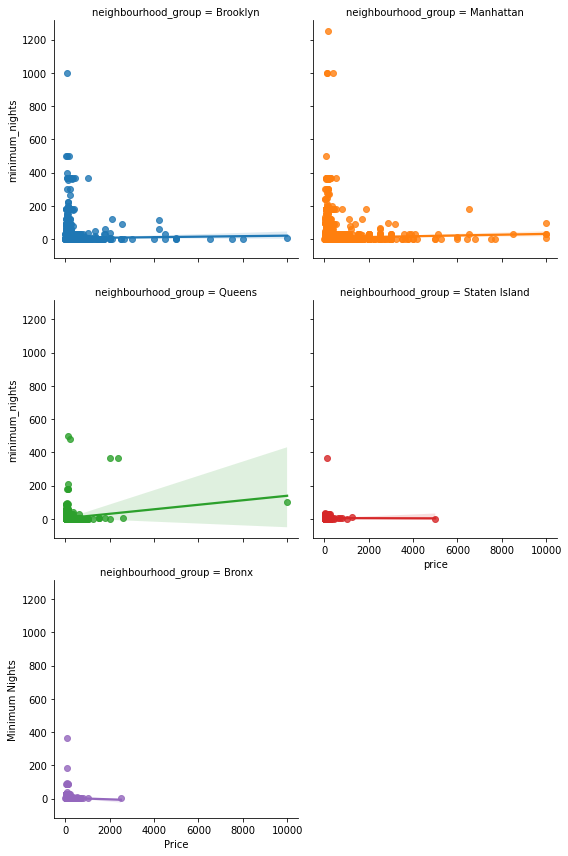

In [17]:
sns.lmplot(x="price", y="minimum_nights", col="neighbourhood_group", hue="neighbourhood_group",
               data=df, col_wrap=2, height=4)

plt.xlabel('Price', size=10)
plt.ylabel("Minimum Nights", size=10)

plt.show()

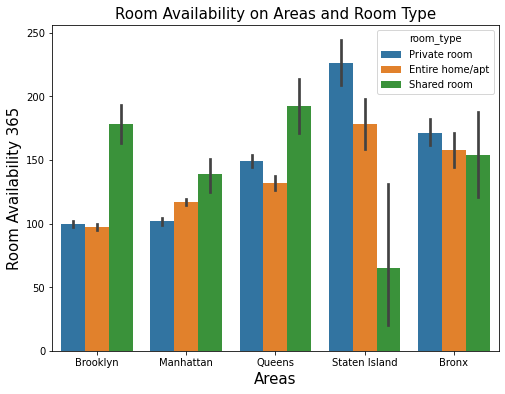

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type')

plt.title("Room Availability on Areas and Room Type", size=15)
plt.xlabel("Areas", size=15)
plt.ylabel("Room Availability 365", size=15)
           
plt.show()

In [19]:
top20_neighbourhood= df['neighbourhood'].value_counts().head(20)

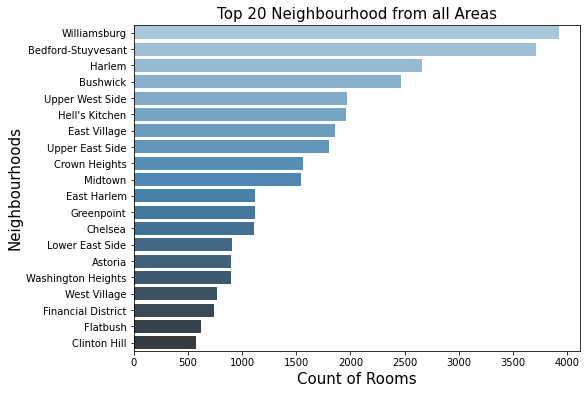

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df, x=top20_neighbourhood, y=top20_neighbourhood.index, palette="Blues_d")

plt.title("Top 20 Neighbourhood from all Areas", size=15)
plt.xlabel("Count of Rooms", size=15)
plt.ylabel("Neighbourhoods", size=15)

plt.show()

In [21]:
count_neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].nunique()
count_neighbourhood

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64

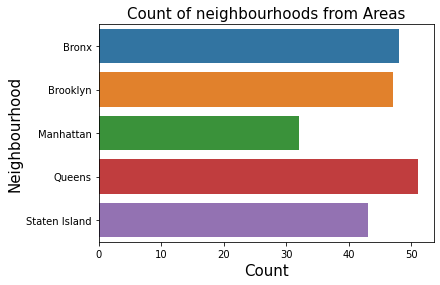

In [22]:
sns.barplot(data=df, x=count_neighbourhood, y=count_neighbourhood.index)

plt.title("Count of neighbourhoods from Areas", size=15)
plt.xlabel("Count", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

In [23]:
top_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)
top_price

neighbourhood
Fort Wadsworth       800.00
Woodrow              700.00
Tribeca              490.64
Sea Gate             487.86
Riverdale            442.09
Prince's Bay         409.50
Battery Park City    367.56
Flatiron District    341.93
Randall Manor        336.00
NoHo                 295.72
SoHo                 287.10
Midtown              282.72
Neponsit             274.67
West Village         267.68
Greenwich Village    263.41
Chelsea              249.74
Willowbrook          249.00
Theater District     248.01
Nolita               230.14
Financial District   225.49
Name: price, dtype: float64

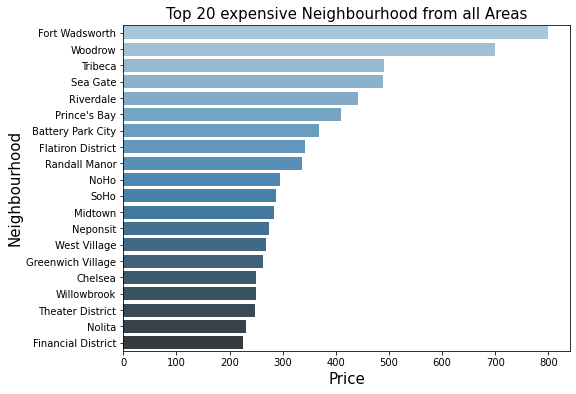

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df, x=top_price, y=top_price.index, palette="Blues_d")

plt.title("Top 20 expensive Neighbourhood from all Areas", size=15)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

In [25]:
manhattan = df[df['neighbourhood_group'] == "Manhattan"]
m_price = manhattan.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

In [26]:
brooklyn = df[df['neighbourhood_group'] == 'Brooklyn']
b_price = brooklyn.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

In [27]:
queens = df[df['neighbourhood_group'] == 'Queens']
q_price = queens.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

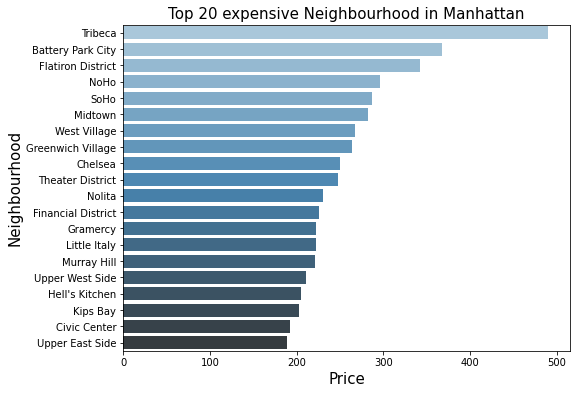

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=manhattan, x=m_price, y=m_price.index, palette="Blues_d")

plt.title("Top 20 expensive Neighbourhood in Manhattan", size=15)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

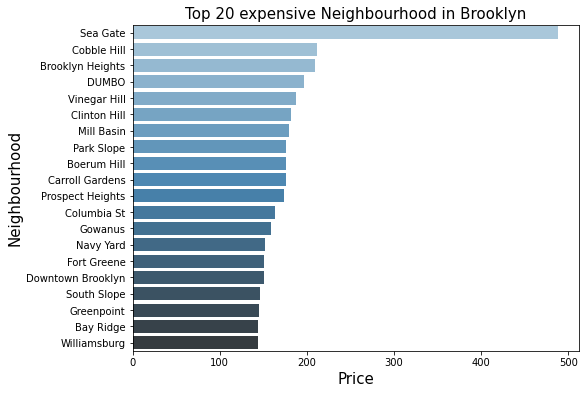

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=brooklyn, x=b_price, y=b_price.index, palette="Blues_d")

plt.title("Top 20 expensive Neighbourhood in Brooklyn", size=15)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

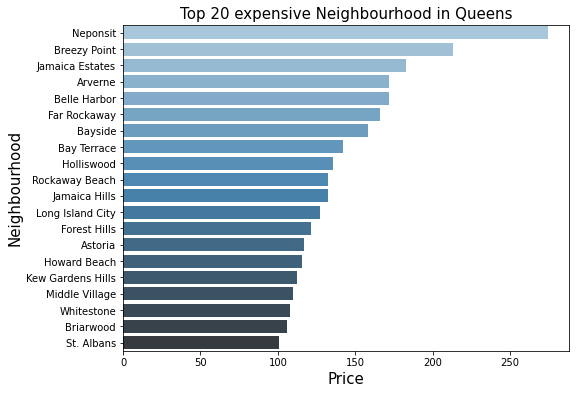

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=queens, x=q_price, y=q_price.index, palette="Blues_d")

plt.title("Top 20 expensive Neighbourhood in Queens", size=15)
plt.xlabel("Price", size=15)
plt.ylabel("Neighbourhood", size=15)

plt.show()

#### **2. Room vs Host vs Review (What kind of rooms, areas or hosts are popular than others? and why?)**

In [31]:
neighbourhood_review = df.groupby(['neighbourhood'])[['number_of_reviews', 'reviews_per_month']].mean().sort_values(by='number_of_reviews',ascending=False).head(10)
neighbourhood_review

,number_of_reviews,reviews_per_month
neighbourhood,,
Silver Lake,118.50,4.34
East Elmhurst,81.66,4.82
Richmondtown,79.00,2.56
Eltingville,76.00,2.47
Mount Eden,70.00,1.78
Springfield Gardens,69.09,4.46
Tompkinsville,57.14,2.21
Huguenot,55.67,3.76
Manhattan Beach,50.62,1.47


In [32]:
n_list = ["Silver Lake",
"East Elmhurst",
"Richmondtown",
"Eltingville",
"Mount Eden",
"Springfield Gardens",
"Tompkinsville",
"Huguenot",
"Manhattan Beach",
"Highbridge"]

top10_n = df[df['neighbourhood'].isin(n_list)]

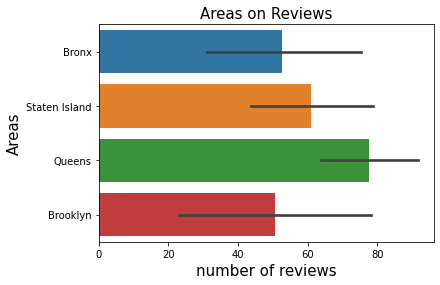

In [33]:
fig, ax = plt.subplots()
sns.barplot(data=top10_n, x='number_of_reviews', y='neighbourhood_group')

plt.title("Areas on Reviews", size=15)
plt.xlabel("number of reviews", size=15)
plt.ylabel("Areas", size=15)

plt.show()

In [34]:
top10_host_list = ["Dona", "Asa", "Dennis & Naoko", "Miss Dy", "Shunichi", "Gladys & Bob", "Sne", "Malini", "Amia", "J. E"]
top10_host = df[df['host_name'].isin(top10_host_list)]

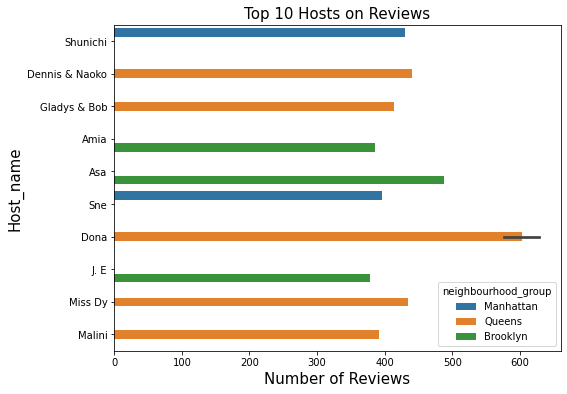

In [35]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=top10_host, x='number_of_reviews', y='host_name', hue='neighbourhood_group')

plt.title("Top 10 Hosts on Reviews", size=15)
plt.xlabel('Number of Reviews', size=15)
plt.ylabel("Host_name", size=15)

plt.show()

## **PHASE 5: Share**
#### **1. Share my conclusion**
* **1. Area vs Price vs Room Type**
    * The airbnb rooms are mostly in Manhatten, Brooklyn.
    * The room types are mostly entire room/apartment or private room.
    * Menhatten is the most expensive area.
    * Entire home/apartment is the most expensive room type in entire area.
    * Manhatten is the area that has highst demand of minimum nights.
    * Entire home/apartment is the room type that has highst demand of minimum nights.
    * There is a barely relationship between price and minimum nights.
    * The rooms in Manhatten, Brooklyn are only available around 3~5 months, no matther which room type.
    
    * Top 3 expensive Neighbourhood in each Areas
        * **Manhattan**
            * Tribeca
            * Battery Park City
            * Flatiron District
        * **Brooklyn**
            * Sea Gate
            * Cobble Hill
            * Brooklyn Heights
        * **Queens**
            * Neponsit
            * Breezy Point
            * Jamaica Estates
 
 <br>
* **2. Room vs Host vs Review (What kind of rooms, areas or hosts are popular than others? and why?)**
    * The rooms in Queens has the most reviews than other rooms in other areas and most top hosts have rooms in Queens also.
    * The reason for it may be because of the price.
    * The rooms in Manhatten, Brooklyn are very expensive compared to the rooms in Queens, i would say that's why people use the rooms in Queens more.